# Technical Test @LeKiosk

###### Explorer le dataset «testDS_dataset»avec l’outil Python et décrire les données trouvées. Ce dataset contient des lectures de magazines ou journaux. Proposer une analyse sur les habitudes de lecture des utilisateurs selon qu’ils utilisent une tablette ou untéléphone mobile. Livrable: code écrit et analyse présentée sur 1 slide.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
mpl.style.use('ggplot')

In [2]:
data = pd.read_csv("testDS_dataset.csv")

In [3]:
data

,IdUser,LabelPublication,device,Category,date,hour,minute,sessions,sessionDuration,avgSessionDuration
0,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,18,35,1,3751,3751.0
1,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,18,35,1,3751,3751.0
2,0,Cuisine a & d Hors Série,tablet,Cuisine,2018-11-02 0:00:00,18,38,1,3751,3751.0
3,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,18,34,1,3751,3751.0
4,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,18,32,1,3751,3751.0
5,0,Octane,tablet,Auto & Moto,2018-11-02 0:00:00,18,33,1,3751,3751.0
6,0,So Foot,tablet,Sports,2018-11-02 0:00:00,18,35,1,3751,3751.0
7,0,So Foot,tablet,Sports,2018-11-02 0:00:00,18,36,1,3751,3751.0
8,0,Désirs de Voyages,tablet,Voyages,2018-11-02 0:00:00,18,45,1,3751,3751.0
9,0,Grands Reportages,tablet,Voyages,2018-11-02 0:00:00,18,41,1,3751,3751.0


## Data Exploration

In [4]:
# Creating a copy of original data
data1 = data.copy(deep = True)
data1 = pd.DataFrame(data1)

# First look at data
print (data1.info())
print ("-" * 10)
data1.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93197 entries, 0 to 93196
Data columns (total 10 columns):
IdUser                93197 non-null int64
LabelPublication      93197 non-null object
device                93197 non-null object
Category              93084 non-null object
date                  93197 non-null object
hour                  93197 non-null int64
minute                93197 non-null int64
sessions              93197 non-null int64
sessionDuration       93197 non-null int64
avgSessionDuration    93197 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 7.1+ MB
None
----------


,IdUser,LabelPublication,device,Category,date,hour,minute,sessions,sessionDuration,avgSessionDuration
count,93197.000000,93197,93197,93084,93197,93197.000000,93197.000000,93197.000000,93197.000000,93197.000000
unique,NaN,1470,2,21,30,NaN,NaN,NaN,NaN,NaN
top,NaN,Paris Match,tablet,People & TV,2018-11-25 0:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,2644,72173,12071,4138,NaN,NaN,NaN,NaN,NaN
mean,1324.208987,NaN,NaN,NaN,NaN,13.668991,29.221885,1.000172,2450.140037,2449.816242
std,770.703061,NaN,NaN,NaN,NaN,6.597767,17.212183,0.018529,2639.717619,2639.136828
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000
25%,638.000000,NaN,NaN,NaN,NaN,8.000000,14.000000,1.000000,556.000000,556.000000
50%,1337.000000,NaN,NaN,NaN,NaN,14.000000,30.000000,1.000000,1684.000000,1684.000000
75%,1996.000000,NaN,NaN,NaN,NaN,20.000000,44.000000,1.000000,3436.000000,3436.000000


* This data was fetched during the month of November
* On average, users spend about 42 minutes per session
* Most people read on their tablet
* The most read magazine is Paris Match
* The most read category is People & TV

In [5]:
# Replace NaN in 'Category'

data1['Category'].fillna('Misc', inplace = True)

# Number of users per Category 

category_id = data1["IdUser"].groupby(data1["Category"]).sum()

# Sort by most popular Categories

category_id.sort_values(ascending=False, inplace=True)

# Convert to percentages

category_id = (100. * category_id / category_id.sum()).round(0)
category_id.head(5)

Category
People & TV    12.0
Actualités     12.0
Quotidiens     11.0
Auto & Moto     9.0
Féminin         6.0
Name: IdUser, dtype: float64

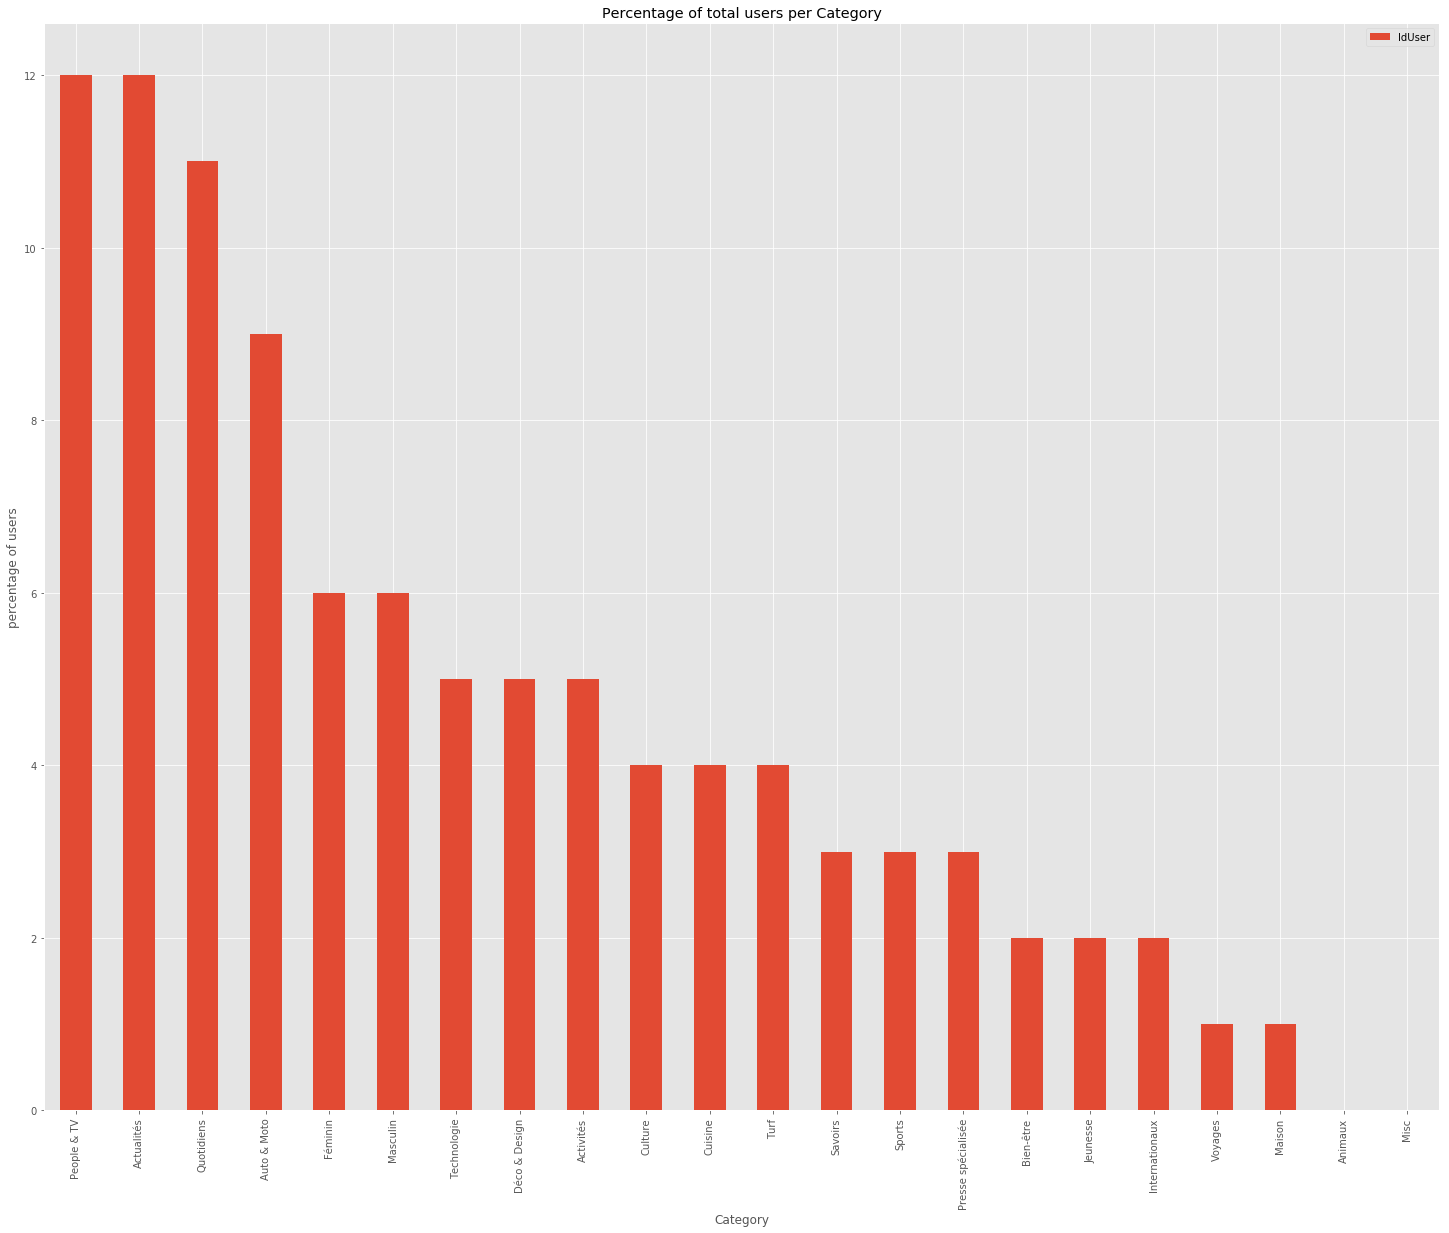

In [17]:
plt.figure(figsize=[25,20])

category_id.plot.bar()
plt.title('Percentage of total users per Category')
plt.ylabel('percentage of users')
plt.legend()

In [7]:
# Compute the number of sessions per user

session_id = data1["sessions"].groupby(data1["IdUser"]).sum()
print (session_id.head(10))
print ('-' * 10)
print (session_id.describe(include='all'))

IdUser
0    143
1      8
2     82
3     78
4     10
5     18
6     30
7     13
8     29
9     30
Name: sessions, dtype: int64
----------
count    2647.000000
mean       35.214583
std        47.616143
min         1.000000
25%         7.000000
50%        19.000000
75%        45.000000
max       640.000000
Name: sessions, dtype: float64


* On average, users open 35 sessions during the month of November. Looking at the time of sessions' openings (i.e. 'hour' & 'minute'), it seems users can open many sessions at the same time.

## Split by devices

In [8]:
data_t = data1[data1['device'] == 'tablet']
data_m = data1[data1['device'] == 'mobile']

In [9]:
data_t.describe(include = 'all')

,IdUser,LabelPublication,device,Category,date,hour,minute,sessions,sessionDuration,avgSessionDuration
count,72173.000000,72173,72173,72173,72173,72173.000000,72173.000000,72173.000000,72173.000000,72173.000000
unique,NaN,1404,1,22,30,NaN,NaN,NaN,NaN,NaN
top,NaN,Paris Match,tablet,People & TV,2018-11-25 0:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,2129,72173,9490,3446,NaN,NaN,NaN,NaN,NaN
mean,1335.661051,NaN,NaN,NaN,NaN,13.797791,29.204897,1.000222,2617.237471,2616.819355
std,776.430909,NaN,NaN,NaN,NaN,6.639072,17.219521,0.021056,2726.410735,2725.710214
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000
25%,638.000000,NaN,NaN,NaN,NaN,8.000000,14.000000,1.000000,667.000000,667.000000
50%,1355.000000,NaN,NaN,NaN,NaN,15.000000,30.000000,1.000000,1850.000000,1849.000000
75%,2020.000000,NaN,NaN,NaN,NaN,20.000000,44.000000,1.000000,3673.000000,3673.000000


* 77% of users are tablet readers
* Their average reading time is 44 minutes per session, which is slightly more than for the whole population
* Paris Match is their favorite magazine, which is represented in the total population

In [10]:
data_m.describe(include = 'all')

,IdUser,LabelPublication,device,Category,date,hour,minute,sessions,sessionDuration,avgSessionDuration
count,21024.000000,21024,21024,21024,21024,21024.000000,21024.000000,21024.0,21024.000000,21024.000000
unique,NaN,995,1,22,30,NaN,NaN,NaN,NaN,NaN
top,NaN,Le Parisien,mobile,Quotidiens,2018-11-02 0:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,995,21024,3138,891,NaN,NaN,NaN,NaN,NaN
mean,1284.895358,NaN,NaN,NaN,NaN,13.226836,29.280204,1.0,1876.513556,1876.513556
std,749.395214,NaN,NaN,NaN,NaN,6.434531,17.187252,0.0,2224.065434,2224.065434
min,4.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.0,1.000000,1.000000
25%,629.000000,NaN,NaN,NaN,NaN,8.000000,14.000000,1.0,320.000000,320.000000
50%,1280.000000,NaN,NaN,NaN,NaN,13.000000,30.000000,1.0,1157.000000,1157.000000
75%,1946.000000,NaN,NaN,NaN,NaN,19.000000,44.000000,1.0,2587.000000,2587.000000


* 23% of readers are mobile users
* Their average reading time per session is 31 minutes, 10 min less than tablet readers. This is linked to the fact that tablets are more appropriate and confortable as a reading device
* Their favorite journal is Le Parisien, and their favorite category is 'Quotidiens' journals. 

#### Time spent split by devices

In [11]:
#time spent per session on tablet
session_id_t = data_t["sessions"].groupby(data_t["IdUser"]).sum()
print ('sessions opened per tablet user:')
print (session_id_t.describe(include='all'))
print ('-' * 10)

#time spent per session on mobile
session_id_m = data_m["sessions"].groupby(data_m["IdUser"]).sum()
print ('sessions opened per mobile user:')
print (session_id_m.describe(include='all'))

sessions opened per tablet user:
count    1941.000000
mean       37.191654
std        49.018063
min         1.000000
25%         8.000000
50%        21.000000
75%        47.000000
max       589.000000
Name: sessions, dtype: float64
----------
sessions opened per mobile user:
count    1156.000000
mean       18.186851
std        29.098305
min         1.000000
25%         3.000000
50%         8.000000
75%        21.250000
max       320.000000
Name: sessions, dtype: float64


* Tablet users opened 37 sessions on average during November, whereas mobile users opened half as much

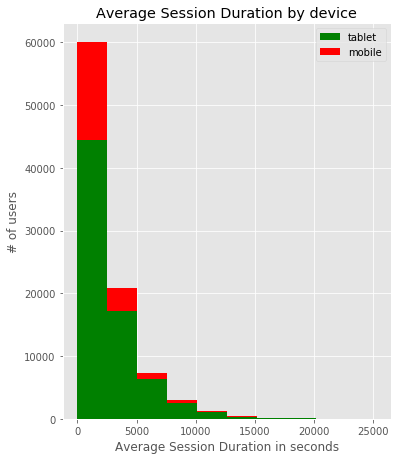

In [12]:
plt.figure(figsize=[20,16])

plt.subplot(234)
plt.hist(x = [data1[data1['device']=='tablet']['avgSessionDuration'], 
        data1[data1['device']=='mobile']['avgSessionDuration']], 
        stacked=True, color = ['g','r'],label = ['tablet','mobile'])
plt.title('Average Session Duration by device')
plt.xlabel('Average Session Duration in seconds')
plt.ylabel('# of users')
plt.legend()

#### Categories split by device

In [13]:
# Number of users per Category for Tablet Users
category_id_t = data_t["IdUser"].groupby(data_t["Category"]).sum()
category_id_t.sort_values(ascending=False, inplace=True)

# Number of users per Category for Mobile Users
category_id_m = data_m["IdUser"].groupby(data_m["Category"]).sum()
category_id_m.sort_values(ascending=False, inplace=True)

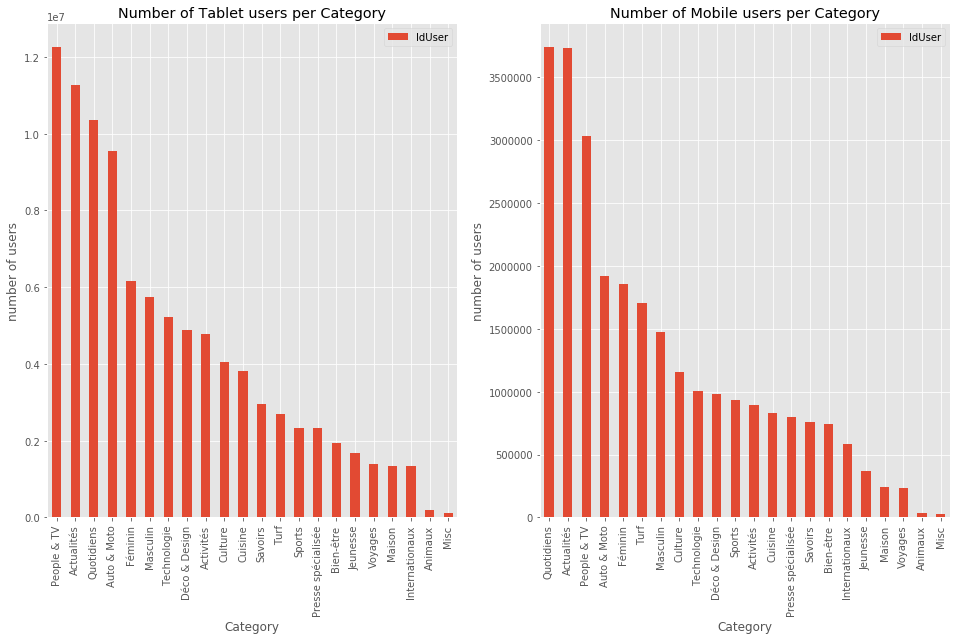

In [19]:
plt.figure(figsize=[25,20])

plt.subplot(232)
category_id_t.plot.bar()
plt.title('Number of Tablet users per Category')
plt.ylabel('number of users')
plt.legend()

plt.subplot(233)
category_id_m.plot.bar()
plt.title('Number of Mobile users per Category')
plt.ylabel('number of users')
plt.legend()